### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

Independent variable - Either the color of the ink matches the printed words (Congruent), **OR** the color of the ink is different than the printed words (Incongruent).

Dependent variable - time to name the color of the ink in which the words are printed. 

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Symbols:**
>$\mu$ (Greek term mu): Population mean represents the actual mean of the whole population.[4]<br>
$\bar{x}$ (pronounced as x bar): Sample mean is the arithmetic mean of random sample values drawn from the population.[4]<br>

**Hypothesis:**
>**$H_{0}$**: $\mu_{c} \geq \mu_{i}$<br>
Null Hypothesis: the mean time for the congruent word list is greater than or equal to the mean time for the incongruent word list within the population.
>
>**$H_{A}$**: $\mu_{c} < \mu_{i}$<br>
Alternative Hypothesis: the mean time for the congruent word list is less than the mean time for the incongruent word list within the population.

**The general rule of thumb for when to use a t score [instead of a z score] is when your sample [3][5]:**
>Has a sample size below 30,<br>
>Has an unknown population standard deviation.<br>
>You must know the standard deviation of the population and your sample size should be above 30 in order for you to be able to use the z-score. Otherwise, use the t-score [5].

Since the sample size is 24, the population standard deviation is unknown, and the data is **NOT** a normal distribution, **using the t score is the best choice for testing our hypothesis.**

In addition, **the type of t test to use is a one-tailed t-test [1]**. A one-tailed test will test either if the mean is significantly greater than x or if the mean is significantly less than x, but not both [6].<br>
<br>
A two-tailed test is used when testing the alternative hypothesis of *"not equal"*, **$H_{A}$**: $\mu_{c} \neq \mu_{i}$

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df.shape

(24, 2)

In [2]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
###Removed Line Plot per the following considerations:
###the line plot is not appropriate for the dataset, because connecting the data points with a line implies a
###sequential relationship between participants, but participants are independent of each other - the performance
###of one participant should not imply anything speci
#df.plot.line()
#plt.title('The Stroop Effect', fontsize=12)
#plt.xlabel('Participant Number', fontsize=12)
#plt.ylabel('Time (seconds)', fontsize=12);

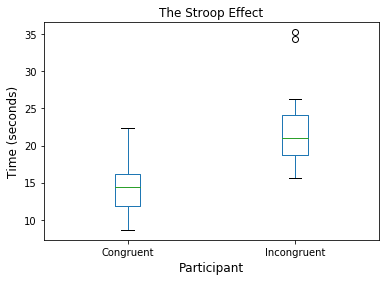

In [4]:
df.plot.box()
plt.title('The Stroop Effect', fontsize=12)
plt.xlabel('Participant', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12);

Looking at the graphs, it seems there will be a statistically significant difference between the Congruent and Incongruent word lists. For each sample, the time for the congruent word list was always less than the incongruent word list.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [5]:
# Perform the statistical test here
import scipy.stats as stats
stats.ttest_rel(df['Incongruent'], df['Congruent'], axis=0)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

**Source** [7]:
>When you call scipy.stats.ttest_ind(x, y), this makes a Hypothesis Test on the value of x.mean()-y.mean(), which means that in order to get positive values throughout the calculation (which simplifies all considerations) we have to call stats.ttest_ind(B,A).
>
>From the above Stack Overflow post, we must call stats.ttest_rel(df['Incongruent'], df['Congruent'], axis=0) in order to test if we get a **POSITIVE** t critical statistic value.

** t value from t Table** [2]:
>Degrees of Freedom (DF): 23<br>
>confidence interval: 99.9%<br>
>$\alpha$ level one-tailed test: 0.001<br>
>t critical statistic value: 3.485

Since our t-statistic of 8.020706944109957 was **GREATER THAN** the t critical statistic value of 3.485, *we REJECT the null hypythesis $H_{0}$ at the 0.001 signifcant level* [8].

This matched my expectation that the incongruent words would take longer than the congruent words and be statistically significant.

Sources:
> [1] http://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/<br>
>[2] http://www.mysmu.edu/faculty/denisleung/t_table.pdf<br>
>[3] http://www.statisticssolutions.com/manova-analysis-one-sample-t-test/<br>
>[4] https://keydifferences.com/difference-between-sample-mean-and-population-mean.html <br>
>[5] http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/<br>
>[6] https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/<br>
>[7] https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy<br>
>[8] https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/inference/supporting-topics/basics/what-is-a-critical-value/